In [1]:
# Dependencies and Setup
# --------------------------------------------------------------
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")
import ast
from wordcloud import WordCloud
from collections import Counter

## Data

**read_csv** - Read a comma-separated values (csv) file into DataFrame.

**merge** - Merge DataFrame or named Series objects with a database-style join. The join is done on columns or indexes. If joining columns on columns, the DataFrame indexes will be ignored. Otherwise if joining indexes on indexes or indexes on a column or columns, the index will be passed on. When performing a cross merge, no column specifications to merge on are allowed.

In [2]:
# Read the csv file into a pandas DataFrame
# --------------------------------------------------------------
data = pd.read_csv("../Resources/data/tmdb_data.csv")

# Merge Aditional Features with original dataset on the 'imdb_id'
# --------------------------------------------------------------------------------
data = pd.merge(data, pd.read_csv('../Resources/data/tmdb_AdditionalFeatures.csv'), how='left', on=['imdb_id'])

print(data.shape)

(3000, 26)


**skew()** - Pandas dataframe.skew() function returns unbiased skew over requested axis Normalized by N-1. Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.

In [3]:
# Apply the pandas `.skew()` function to find skewness of the dataframe. 
# --------------------------------------------------------------------------------
pd.DataFrame(data.skew().sort_values(ascending=False)).head(10)

,0
popularity,14.377407
revenue,4.542285
totalVotes,4.189146
budget,3.103530
popularity2,1.952750
runtime,1.017619
id,0.000000
rating,-0.489699


## Data Exploration and Cleaning

**copy()** - Make a copy of this object’s indices and data. When deep=True (default), a new object will be created with a copy of the calling object’s data and indices. Modifications to the data or indices of the copy will not be reflected in the original object (see notes below). When deep=False, a new object will be created without copying the calling object’s data or index (only references to the data and index are copied). Any changes to the data of the original will be reflected in the shallow copy (and vice versa).

In [4]:
# Create a copy of the object’s indices and data
# --------------------------------------------------------------------------------
data_explore = data.copy()

**.info()** - This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [5]:
# Print summary of DataFrame
# --------------------------------------------------------------------------------
data_explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

**isna()** - Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values. Characters such as empty strings '' or numpy.inf are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True).

**sum()** - Return the sum of the values over the requested axis.

In [6]:
# Detect missing values in entire dataset
# --------------------------------------------------------------------------------
data_explore.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
popularity2               118
rating                    118
totalVotes                118
dtype: int64

**.apply** - Apply a function along an axis of the DataFrame. Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1). By default (result_type=None), the final return type is inferred from the return type of the applied function. Otherwise, it depends on the result_type argument.

**lambada** - A Lambda Function is an anonymous function or a function having no name. It is a small and restricted function having no more than one line. Just like a normal function, a Lambda function can have multiple arguments with one expression.

**astype** - Cast a pandas object to a specified dtype.

In [7]:
# Identify all movies in dataframe which are part of a sequel. 
# If Null then populate with 0 else 1. 1 indicates movie is part of a sequel.
# --------------------------------------------------------------------------------
data_explore['sequel'] = data_explore['belongs_to_collection'].apply(lambda x: 0 if pd.isna(x) else 1).astype('int64')

**.year** - The year of the datetime.

**.month** - The month as January=1, December=12.

**.day** - The day of the datetime.

**.dayofweek** - The day of the week with Monday=0, Sunday=6. Return the day of the week. It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6. This method is available on both Series with datetime values (using the dt accessor) or DatetimeIndex.

In [8]:
# Function to extract the year, month and day on which the movie was release. Date format is mm/dd/YY.
# --------------------------------------------------------------------------------
def modify_date(x):
    x=str(x)
    year=x.split('/')[2]
    if int(year)<20:
        return x[:-2]+'20'+year
    else:
        return x[:-2]+'19'+year
    
data_explore['release_date']=data_explore['release_date'].apply(lambda x: modify_date(x))
data_explore['release_year'] = pd.DatetimeIndex(data_explore['release_date']).year
data_explore['release_month'] = pd.DatetimeIndex(data_explore['release_date']).month
data_explore['release_day'] = pd.DatetimeIndex(data_explore['release_date']).day
data_explore['release_dayofweek'] = pd.DatetimeIndex(data_explore['release_date']).dayofweek

In [9]:
# Detect missing values in dataset and save to new dataframe. Dataframe will be used to clean up the NaN
# --------------------------------------------------------------------------------
nan_cols = data_explore.isna().sum()
nan_cols[nan_cols>0]

belongs_to_collection    2396
genres                      7
homepage                 2054
overview                    8
poster_path                 1
production_companies      156
production_countries       55
runtime                     2
spoken_languages           20
tagline                   597
Keywords                  276
cast                       13
crew                       16
popularity2               118
rating                    118
totalVotes                118
dtype: int64

**describe()** - Generate descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [10]:
# Generate descriptive statistics on dataframe
# --------------------------------------------------------------------------------
data_explore.describe()

,id,budget,popularity,runtime,revenue,popularity2,rating,totalVotes,sequel,release_year,release_month,release_day,release_dayofweek
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03,2882.000000,2882.000000,2882.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07,8.029303,6.366308,933.938584,0.201333,1999.713000,6.775333,15.046333,3.269333
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08,4.959153,0.887465,1795.101380,0.401063,15.423313,3.409115,8.632981,1.306150
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00,0.600000,1.000000,1.000000,0.000000,1921.000000,1.000000,1.000000,0.000000
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06,5.046250,5.800000,82.000000,0.000000,1993.000000,4.000000,8.000000,2.000000
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07,7.503500,6.400000,292.500000,0.000000,2004.000000,7.000000,15.000000,4.000000
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07,9.987000,7.000000,900.500000,0.000000,2011.000000,10.000000,22.000000,4.000000
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,45.153000,9.000000,18931.000000,1.000000,2017.000000,12.000000,31.000000,6.000000


**ast** - The ast module helps Python applications to process trees of the Python abstract syntax grammar. The abstract syntax itself might change with each Python release; this module helps to find out programmatically what the current grammar looks like.

**.apply** - Apply a function along an axis of the DataFrame. Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1). By default (result_type=None), the final return type is inferred from the return type of the applied function. Otherwise, it depends on the result_type argument.

**.isna** - Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values. Characters such as empty strings '' or numpy.inf are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True).

**literal_eval** - Safely evaluate an expression node or a Unicode or Latin-1 encoded string containing a Python expression. The string or node provided may only consist of the following Python literal structures: strings, numbers, tuples, lists, dicts, booleans, and None.


In [11]:
# Store all columns which contain JSON format into a dataframe ([Array{Object}] )
# --------------------------------------------------------------------------------
import ast
dict_cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

for col in dict_cols:
    data_explore[col] = data_explore[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

**.columns** - The column labels of the DataFrame.

**.any** - Return True if any value in the group is truthful, else False.

**.isna()** - Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values. Characters such as empty strings '' or numpy.inf are not considered NA values (unless you set pandas.options.mode.use_inf_as_na = True).

**.tolist()** - Return a list of the values. These are each a scalar type, which is a Python scalar (for str, int, float) or a pandas scalar (for Timestamp/Timedelta/Interval/Period)

**.remove** - Inbuilt function that removes a given object from the List.

**.fillna** - Fill NA/NaN values using the specified method.

**.median()** - Compute median (the middle number in a sorted, ascending or descending, list of numbers) of groups, excluding missing values.

In [12]:
# Clean up and replace all NA values with value
# --------------------------------------------------------------------------------
na_cols = data_explore.columns[data_explore.isna().any()].tolist()
na_cols.remove('overview')
na_cols.remove('runtime')
na_cols.remove('popularity2')
na_cols.remove('rating')
na_cols.remove('totalVotes')
data_explore['runtime'].fillna(value=data_explore['runtime'].median(), inplace=True)
data_explore['overview'].fillna(value='', inplace=True)
data_explore['popularity2'].fillna(value=0, inplace=True)
data_explore['rating'].fillna(value=0, inplace=True)
data_explore['totalVotes'].fillna(value=0, inplace=True)

for col in na_cols:
    data_explore[col].fillna(value='', inplace=True)

## Top Keywords in Movies

**for & in** - Function used to create loops. Generally for a repetitive function, `return` is usually used to return a value and `in` is a condition if a value is in inside a collection.

**enumerate** - (iterable, start=0) Return an enumerate object. iterable must be a sequence, an iterator, or some other object which supports iteration. The __next__() method of the iterator returned by enumerate() returns a tuple containing a count (from start which defaults to 0) and the values obtained from iterating over iterable. 
 ** seasons = ['Spring', 'Summer', 'Fall', 'Winter']
 ** list(enumerate(seasons))[(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]
 
**print** - function takes in any number of parameters, and prints them out on one line of text. The items are each converted to text form, separated by spaces, and there is a single '\n' at the end (the "newline" char). When called with zero parameters, print() just prints the '\n' and nothing else.

In [13]:
# Create a For loop for Keywords and return the "name:" value
# --------------------------------------------------------------------------------
for i, e in enumerate(data_explore['Keywords'][:2]):
    print(i,e)

0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]


**list** - Takes an iterable object as input and adds its elements to a newly created list. Elements can be anything. It can also be an another list or an iterable object, and it will be added to the new list as it is. i.e no nested processing will happen.

**.most_common** - Return a list of the n most common elements and their counts from the most common to the least. If n is not specified, most_common() returns all elements in the counter. Elements with equal counts are ordered arbitrarily (on the basis of random choice).

In [14]:
# Create a list of Keywords and the total count.
# --------------------------------------------------------------------------------
list_keywords = list(data_explore['Keywords'].apply(lambda x: [i['name'] for i in x] if x!= {} else []))
Counter(i for j in list_keywords for i in j).most_common(10)

[('woman director', 175),
 ('independent film', 155),
 ('duringcreditsstinger', 134),
 ('murder', 123),
 ('based on novel', 111),
 ('violence', 87),
 ('sport', 82),
 ('biography', 77),
 ('aftercreditsstinger', 75),
 ('dystopia', 73)]

In [15]:
# Store top 10 Keywords in a Variable
# Create new columns in dataframe to capture the count of Keywords per movie, and a string of all Keywords per movie.
# Create a new column per Keyword (10 Most common) and Place a 1 (True) or 0 (False) where the Keyword is applicable per movie
# --------------------------------------------------------------------------------
top_keywords = [m[0] for m in Counter(i for j in list_keywords for i in j).most_common(10)]

data_explore['num_of_keywords'] = data_explore['Keywords'].apply(lambda x: len(x) if x!={} else 0)

data_explore['all_keywords'] = data_explore['Keywords'].apply(lambda x: ' '.join(sorted([i['name']for i in x]))
                                               if x!= {} else '')
for k in top_keywords:
    data_explore['keyword_'+ k] = data_explore['all_keywords'].apply(lambda x: 1 if k in x else 0)

**plt.imshow** - The imshow() function in pyplot module of matplotlib library is used to display data as an image

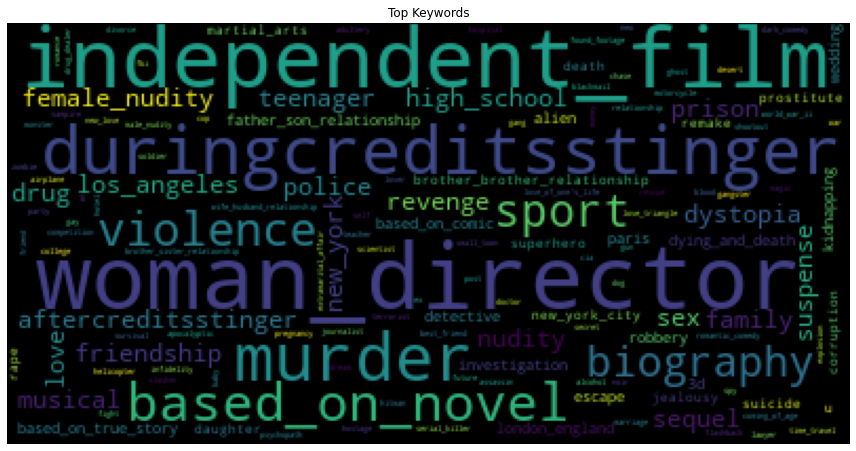

In [16]:
# Apply the wordcloud library in Python to plot and visualise the Top 10 Keywords in dataset
# --------------------------------------------------------------------------------
plt.figure(figsize=(12,10))
text3 = ' '.join(['_'.join(i.split(' ')) for j in list_keywords for i in j])
wordcloud3 = WordCloud(collocations = False).generate(text3)
plt.imshow(wordcloud3)
plt.title('Top Keywords')
plt.axis('off')

# Save and Show plot
plt.tight_layout()
plt.savefig("../Images/wordCloud_Keywords.png")
plt.show()

## Most Common Spoken Languages released for Movies

**for & in** - Function used to create loops. Generally for a repetitive function, `return` is usually used to return a value and `in` is a condition if a value is in inside a collection.

**enumerate** - (iterable, start=0) Return an enumerate object. iterable must be a sequence, an iterator, or some other object which supports iteration. The __next__() method of the iterator returned by enumerate() returns a tuple containing a count (from start which defaults to 0) and the values obtained from iterating over iterable. 
 ** seasons = ['Spring', 'Summer', 'Fall', 'Winter']
 ** list(enumerate(seasons))[(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]

**print** - function takes in any number of parameters, and prints them out on one line of text. The items are each converted to text form, separated by spaces, and there is a single '\n' at the end (the "newline" char). When called with zero parameters, print() just prints the '\n' and nothing else.

In [17]:
# Create a For loop for spoken_languages and return the "name:" value# 
# --------------------------------------------------------------------------------
for i, e in enumerate(data_explore['spoken_languages'][:2]):
    print(i,e)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]


**.value_counts()** - Return a Series containing counts of unique rows in the DataFrame.

In [18]:
# Print the number of Languages a movie has been released in
# --------------------------------------------------------------------------------
print('Number of Languages Movies released in:')
data_explore['spoken_languages'].apply(lambda x: len(x) if x!={} else 0).value_counts()

Number of Languages Movies released in:


1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: spoken_languages, dtype: int64

In [19]:
# Create a list of Keywords and the total count.
# Store the 5 most common spoken_languages in a Variable and return count
# --------------------------------------------------------------------------------
list_of_language = list(data_explore['spoken_languages'].apply(lambda x: [i['name'] for i in x]
                                                    if x!= {} else []))
top_language = [m[0] for m in Counter(i for j in list_of_language for i in j).most_common(5)]

Counter(i for j in list_of_language for i in j).most_common(5)

[('English', 2618),
 ('Français', 288),
 ('Español', 239),
 ('Deutsch', 169),
 ('Pусский', 152)]

**.apply** - Apply a function along an axis of the DataFrame. Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1). By default (result_type=None), the final return type is inferred from the return type of the applied function. Otherwise, it depends on the result_type argument.

**.join** - Join columns of another DataFrame.

In [20]:
# Create new columns in dataframe to capture the count of languages per movie, and a string of all languages per movie.
# Create a new column per Language (5 Most common) and Place a 1 (True) or 0 (False) where the language is applicable per movie
# --------------------------------------------------------------------------------
data_explore['num_of_languages'] = data_explore['spoken_languages'].apply(lambda x: len(x) if x!= {} else 0)

data_explore['all_languages'] = data_explore['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name']for i in x]))
                                                    if x!= {} else '')

for l in top_language:
    data_explore['language_' + l] = data_explore['all_languages'].apply(lambda x: 1 if l in x else 0)

In [21]:
data_explore.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,sequel,release_year,release_month,release_day,release_dayofweek,num_of_keywords,all_keywords,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_biography,keyword_aftercreditsstinger,keyword_dystopia,num_of_languages,all_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/2015,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.400,5.0,482.0,1,2015,2,20,4,4,duringcreditsstinger hot tub sequel time travel,0,0,1,0,0,0,0,0,0,0,1,English,1,0,0,0,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/2004,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,15.229,6.4,1528.0,1,2004,8,6,4,4,coronation duty falling in love marriage,0,0,0,0,0,0,0,0,0,0,1,English,1,0,0,0,0


**plt.imshow** - The imshow() function in pyplot module of matplotlib library is used to display data as an image

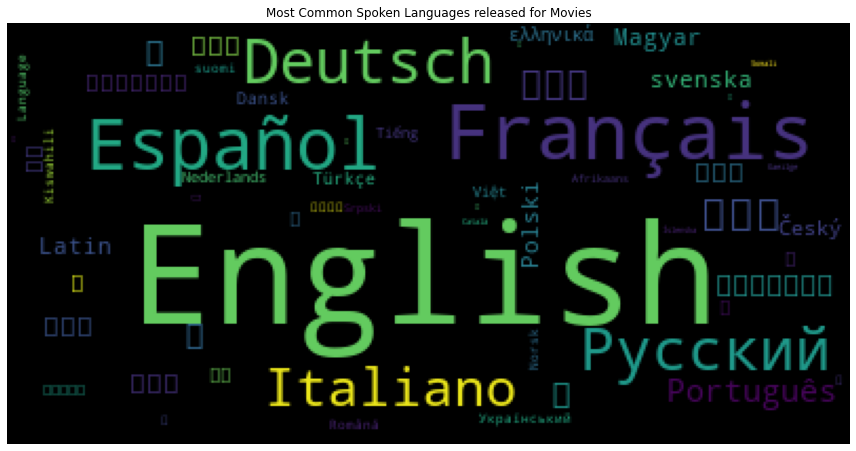

In [22]:
# # Apply the wordcloud library in Python to plot and visualise the Top 10 Keywords in dataset
# --------------------------------------------------------------------------------
plt.figure(figsize=(12,8))
text2 = ' '.join(i for j in list_of_language for i in j)
wordcloud2 = WordCloud(collocations=False).generate(text2)
plt.imshow(wordcloud2)
plt.axis('off')
plt.title('Most Common Spoken Languages released for Movies')

# Save and Show plot
plt.tight_layout()
plt.savefig("../Images/wordCloud_Language.png")
plt.show()

## Director Gender

**.transpose()** - Transpose index and columns. Reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa. The property T is an accessor to the method transpose().

**.rename** - Change axes labels. Function / dict values must be unique (1-to-1). Labels not contained in a dict / Series will be left as-is. Extra labels listed don’t throw an error.

In [23]:
# Create new dataframe to merge back in the original dataframe once the crew column 
# has been replaced with with only the Directors Gender (Returning a 1 for Female and a 2 for Male)
# --------------------------------------------------------------------------------
gender_df = pd.DataFrame([data_explore.imdb_id, data_explore.crew]).transpose()
gender_df = gender_df.rename(columns={'crew': 'director_gender'})
gender_df.head()

,imdb_id,director_gender
0,tt2637294,"[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,tt0368933,"[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,tt2582802,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,tt1821480,"[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,tt1380152,"[{'credit_id': '52fe464b9251416c75073b43', 'de..."


**.append** - Append rows of other to the end of caller, returning a new object. Columns in other that are not in the caller are added as new columns.

In [24]:
# Create a function to loop through the crew column per movie locate the job item in object and append the gender
# --------------------------------------------------------------------------------
def get_gender(x, column):
    gender = []
    for item in x:
        if col=='director_gender':
            if item['job']=='Director' 'gender'==1:
                gender.append(item['gender'])
        elif col=='director_gender':
            if item['job']=='Director' 'gender'==2:
                gender.append(item['gender'])
        else:
            gender.append(item['gender'])
        return gender

In [25]:
gender_df.head(5)

,imdb_id,director_gender
0,tt2637294,"[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,tt0368933,"[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,tt2582802,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,tt1821480,"[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,tt1380152,"[{'credit_id': '52fe464b9251416c75073b43', 'de..."


In [26]:
# Loop through director_gender and print a list of gender where job == Director
# --------------------------------------------------------------------------------
gender =[]
for item in gender_df['director_gender']:
    for j in item:
#         print(j)
        if j['job'] == 'Director':
            print(j['gender'],j['job'])
            gender.append(j['gender'])

2 Director
2 Director
2 Director
0 Director
0 Director
2 Director
2 Director
1 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
0 Director
2 Director
2 Director
2 Director
0 Director
2 Director
0 Director
1 Director
0 Director
2 Director
2 Director
0 Director
0 Director
0 Director
1 Director
0 Director
0 Director
2 Director
0 Director
0 Director
2 Director
1 Director
0 Director
0 Director
0 Director
2 Director
0 Director
0 Director
0 Director
0 Director
2 Director
0 Director
0 Director
2 Director
2 Director
0 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
1 Director
0 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director

2 Director
0 Director
2 Director
2 Director
0 Director
0 Director
2 Director
0 Director
0 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
1 Director
2 Director
2 Director
2 Director
1 Director
2 Director
2 Director
0 Director
0 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
0 Director
2 Director
0 Director
0 Director
0 Director
2 Director
2 Director
0 Director
2 Director
2 Director
1 Director
2 Director
2 Director
2 Director
2 Director
0 Director
0 Director
2 Director
2 Director
0 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director

2 Director
2 Director
2 Director
2 Director
1 Director
0 Director
2 Director
2 Director
0 Director
2 Director
1 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
0 Director
2 Director
2 Director
1 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
0 Director
2 Director
0 Director
2 Director
2 Director
0 Director
0 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
1 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
1 Director
2 Director
1 Director
2 Director
1 Director

0 Director
2 Director
0 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
0 Director
2 Director
2 Director
0 Director
0 Director
0 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
0 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
0 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
2 Director
0 Director
2 Director
2 Director
0 Director
2 Director
2 Director
2 Director
2 Director
0 Director
0 Director
2 Director
0 Director
2 Director

## Director and Lead Cast Members

In [27]:
# Create a function to loop through the crew column per movie locate the job item in object and append the Directors name to the crew column
# Fetch the name field from each JSON object. Extract the Director from Crew only and extract first 3 main cast members from the cast field (main roles from movie)
# --------------------------------------------------------------------------------
def get_names(x, col):
    names = []
    for item in x:
        if col=='crew':
            if item['job']=='Director':
                names.append(item['name'])
        elif col=='cast':
            if item['order'] in (0, 1, 2):
                names.append(item['name'])
        else:
            names.append(item['name'])
    return names

    
for col in dict_cols:
    data_explore[col] = data_explore[col].apply(lambda x: get_names(x, col))

In [28]:
# Show dataframe with all new columns. Crew now only contains the Directors name and Cast contains the first 3 main actors (main roles from movie)
# --------------------------------------------------------------------------------
data_explore.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,sequel,release_year,release_month,release_day,release_dayofweek,num_of_keywords,all_keywords,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_biography,keyword_aftercreditsstinger,keyword_dystopia,num_of_languages,all_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,[Comedy],,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/2015,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke]",[Steve Pink],12314651,10.400,5.0,482.0,1,2015,2,20,4,4,duringcreditsstinger hot tub sequel time travel,0,0,1,0,0,0,0,0,0,0,1,English,1,0,0,0,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[Comedy, Drama, Family, Romance]",,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],[United States of America],8/6/2004,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizondo]",[Garry Marshall],95149435,15.229,6.4,1528.0,1,2004,8,6,4,4,coronation duty falling in love marriage,0,0,0,0,0,0,0,0,0,0,1,English,1,0,0,0,0


## Histogram

Histograms are the backbone to understanding distribution within your series of data. Pandas Histogram provides an easy way to plot a chart right from your data.

Histogram plots traditionally only need one dimension of data. It is meant to show the count of values or buckets of values within your series.

**.hist** - A histogram is a representation of the distribution of data. This function calls matplotlib.pyplot.hist(), on each series in the DataFrame, resulting in one histogram per column.

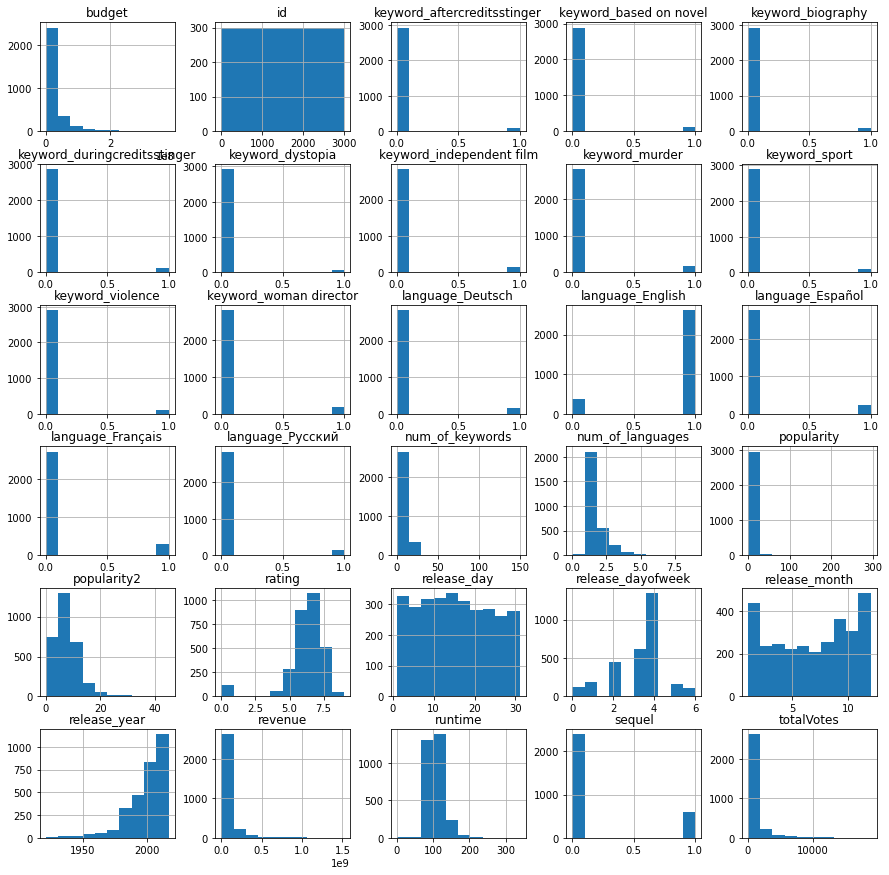

In [29]:
# Create a histogram of the dataFrames columns to understand the distribution within the series of data
# --------------------------------------------------------------------------------
data_explore.hist(figsize=(15, 15))
plt.show()

## Top 10 Most Popular Movies

**.sort_values** - Return a sorted copy of the index, and optionally return the indices that sorted the index itself.

**.apply** - Apply a function along an axis of the DataFrame. Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1). By default (result_type=None), the final return type is inferred from the return type of the applied function. Otherwise, it depends on the result_type argument.

**//** -  Returns the integer value of the quotient (a result obtained by dividing one quantity by another)

In [30]:
# Create dataframe which returns the Top 10 most popular movies based on popularity. Add new columns 'revenue(million)' and 'budget(million)' and return the result.
# --------------------------------------------------------------------------------
most_popular = data_explore.sort_values('popularity', ascending=False).head(10)
most_popular['revenue(million)'] = most_popular['revenue'].apply(lambda x : x//1000000)    # revenue in millions
most_popular['budget(million)'] = most_popular['budget'].apply(lambda x : x//1000000)    # budget in millions
most_popular[['genres','title', 'production_companies','popularity', 'popularity2','rating','totalVotes', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,title,production_companies,popularity,popularity2,rating,totalVotes,cast,crew,budget(million),revenue(million)
518,"[Action, Adventure, Fantasy]",Wonder Woman,"[Dune Entertainment, Atlas Entertainment, Warn...",294.337037,40.447,7.3,11614.0,[],[],149,820
684,"[Family, Fantasy, Romance]",Beauty and the Beast,"[Walt Disney Pictures, Mandeville Films]",287.253654,27.941,6.9,10470.0,"[Emma Watson, Dan Stevens, Luke Evans]",[Bill Condon],160,1262
1695,"[Action, Crime]",Baby Driver,"[Big Talk Productions, TriStar Pictures, Media...",228.032744,19.248,7.4,7325.0,"[Ansel Elgort, Lily James, Kevin Spacey]",[Edgar Wright],34,224
2326,"[Action, Adventure, Comedy]",Deadpool,"[Twentieth Century Fox Film Corporation, Marve...",187.860492,31.708,7.5,18931.0,"[Ryan Reynolds, Morena Baccarin, Ed Skrein]",[Tim Miller],58,783
2126,"[Action, Adventure, Comedy, Science Fiction]",Guardians of the Galaxy Vol. 2,"[Walt Disney Pictures, Marvel Studios]",185.330992,39.214,7.7,11217.0,"[Chris Pratt, Zoe Saldana, Dave Bautista]",[James Gunn],200,863
1309,"[Mystery, Thriller, Drama]",Gone Girl,"[Twentieth Century Fox Film Corporation, Regen...",154.801009,39.667,7.9,9623.0,"[Ben Affleck, Rosamund Pike, Carrie Coon]",[David Fincher],61,369
1715,"[Drama, Science Fiction, War]",War for the Planet of the Apes,[Chernin Entertainment],146.161786,29.360,7.0,4931.0,"[Andy Serkis, Woody Harrelson, Steve Zahn]",[Matt Reeves],152,369
1673,"[Drama, Action, Crime, Thriller]",The Dark Knight,"[DC Comics, Legendary Pictures, Warner Bros., ...",123.167259,31.350,8.4,17810.0,"[Christian Bale, Michael Caine, Heath Ledger]",[Christopher Nolan],185,1004
1126,"[Science Fiction, Action, Adventure]",The Avengers,"[Paramount Pictures, Marvel Studios]",89.887648,45.153,7.6,17988.0,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],220,1519
2293,"[Drama, Thriller, Science Fiction]",The Circle,"[Likely Story, Playtone, Image Nation]",88.439243,11.626,5.5,2511.0,"[Emma Watson, Tom Hanks, John Boyega]",[James Ponsoldt],18,20


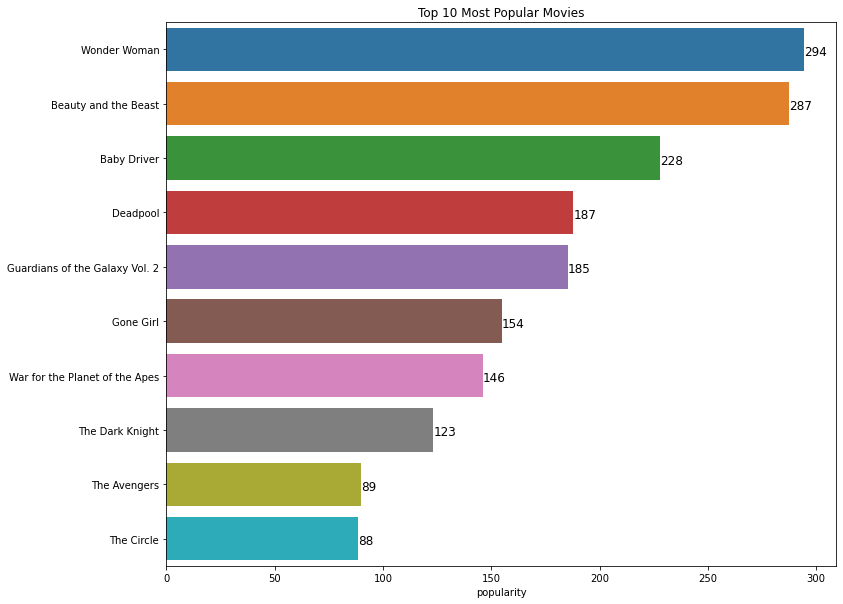

In [31]:
# Plot the Top 10 most popular movies to a horizontal bar chart
# --------------------------------------------------------------------------------
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='title', x='popularity', data=most_popular, order=most_popular.sort_values('popularity', ascending=False).title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 10 Most Popular Movies', fontsize=12)
plt.ylabel('')
plt.show()

In [32]:
# Create dataframe which returns the Top 10 most popular movies based on popularity2. Add new columns 'revenue(million)' and 'budget(million)' and return the result.
# --------------------------------------------------------------------------------
most_popular2 = data_explore.sort_values('popularity2', ascending=False).head(10)
most_popular2['revenue(million)'] = most_popular2['revenue'].apply(lambda x : x//1000000)    # revenue in millions
most_popular2['budget(million)'] = most_popular2['budget'].apply(lambda x : x//1000000)    # budget in millions
most_popular2[['genres','title', 'production_companies','popularity', 'popularity2','rating','totalVotes', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,title,production_companies,popularity,popularity2,rating,totalVotes,cast,crew,budget(million),revenue(million)
1126,"[Science Fiction, Action, Adventure]",The Avengers,"[Paramount Pictures, Marvel Studios]",89.887648,45.153,7.6,17988.0,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],220,1519
114,"[Adventure, Fantasy, Action]",The Lord of the Rings: The Fellowship of the Ring,"[WingNut Films, New Line Cinema, The Saul Zaen...",32.070725,43.951,8.3,13552.0,"[Elijah Wood, Ian McKellen, Cate Blanchett]",[Peter Jackson],93,871
518,"[Action, Adventure, Fantasy]",Wonder Woman,"[Dune Entertainment, Atlas Entertainment, Warn...",294.337037,40.447,7.3,11614.0,[],[],149,820
2802,"[Adventure, Fantasy, Family]",Harry Potter and the Chamber of Secrets,"[1492 Pictures, Heyday films, Warner Bros.]",29.741452,40.269,7.7,10853.0,"[Daniel Radcliffe, Rupert Grint, Emma Watson]",[Chris Columbus],100,876
1309,"[Mystery, Thriller, Drama]",Gone Girl,"[Twentieth Century Fox Film Corporation, Regen...",154.801009,39.667,7.9,9623.0,"[Ben Affleck, Rosamund Pike, Carrie Coon]",[David Fincher],61,369
2126,"[Action, Adventure, Comedy, Science Fiction]",Guardians of the Galaxy Vol. 2,"[Walt Disney Pictures, Marvel Studios]",185.330992,39.214,7.7,11217.0,"[Chris Pratt, Zoe Saldana, Dave Bautista]",[James Gunn],200,863
286,"[Horror, Thriller]",Split,"[Universal Pictures, Blumhouse Productions, Bl...",28.920839,38.559,7.2,9418.0,"[James McAvoy, Anya Taylor-Joy, Betty Buckley]",[M. Night Shyamalan],9,276
2018,"[Action, Science Fiction, Adventure]",Guardians of the Galaxy,"[Marvel Studios, Moving Picture Company (MPC),...",53.291601,37.952,7.9,16508.0,"[Chris Pratt, Zoe Saldana, Dave Bautista]",[James Gunn],170,773
2770,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",37.379420,36.059,7.3,12057.0,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],280,1405
1341,"[Drama, Romance]",The Vow,"[Spyglass Entertainment, Screen Gems]",9.524298,33.271,7.1,2241.0,"[Rachel McAdams, Channing Tatum, Sam Neill]",[Michael Sucsy],30,196


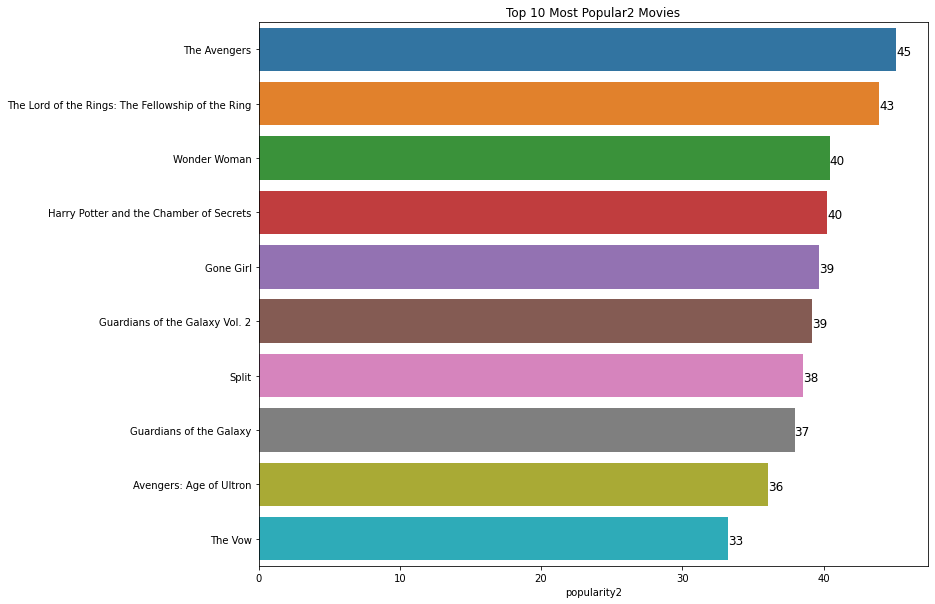

In [33]:
# Plot the Top 10 most popular movies to a horizontal bar chart
# --------------------------------------------------------------------------------
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='title', x='popularity2', data=most_popular2, order=most_popular2.sort_values('popularity2', ascending=False).title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 10 Most Popular2 Movies', fontsize=12)
plt.ylabel('')
plt.show()

## Top 10 Most Voted Movies

In [34]:
# Create dataframe which returns the Top 10 most voted movies based on totalVotes. Add new columns 'revenue(million)' and 'budget(million)' and return the result.
# --------------------------------------------------------------------------------
most_votes = data_explore.sort_values('totalVotes', ascending=False).head(10)
most_votes['revenue(million)'] = most_votes['revenue'].apply(lambda x : x//1000000)    # revenue in millions
most_votes['budget(million)'] = most_votes['budget'].apply(lambda x : x//1000000)    # budget in millions
most_votes[['genres','title', 'production_companies','popularity', 'popularity2','rating','totalVotes', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,title,production_companies,popularity,popularity2,rating,totalVotes,cast,crew,budget(million),revenue(million)
2326,"[Action, Adventure, Comedy]",Deadpool,"[Twentieth Century Fox Film Corporation, Marve...",187.860492,31.708,7.5,18931.0,"[Ryan Reynolds, Morena Baccarin, Ed Skrein]",[Tim Miller],58,783
1126,"[Science Fiction, Action, Adventure]",The Avengers,"[Paramount Pictures, Marvel Studios]",89.887648,45.153,7.6,17988.0,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],220,1519
1673,"[Drama, Action, Crime, Thriller]",The Dark Knight,"[DC Comics, Legendary Pictures, Warner Bros., ...",123.167259,31.350,8.4,17810.0,"[Christian Bale, Michael Caine, Heath Ledger]",[Christopher Nolan],185,1004
2018,"[Action, Science Fiction, Adventure]",Guardians of the Galaxy,"[Marvel Studios, Moving Picture Company (MPC),...",53.291601,37.952,7.9,16508.0,"[Chris Pratt, Zoe Saldana, Dave Bautista]",[James Gunn],170,773
2338,[Drama],Fight Club,"[Twentieth Century Fox Film Corporation, Regen...",63.869599,32.799,8.4,15256.0,"[Edward Norton, Brad Pitt, Meat Loaf]",[David Fincher],63,100
837,"[Action, Adventure, Science Fiction, Thriller]",Mad Max: Fury Road,"[Village Roadshow Pictures, Kennedy Miller Pro...",29.361780,24.647,7.4,13685.0,"[Tom Hardy, Charlize Theron, Nicholas Hoult]",[George Miller],150,378
114,"[Adventure, Fantasy, Action]",The Lord of the Rings: The Fellowship of the Ring,"[WingNut Films, New Line Cinema, The Saul Zaen...",32.070725,43.951,8.3,13552.0,"[Elijah Wood, Ian McKellen, Cate Blanchett]",[Peter Jackson],93,871
906,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,"[Legendary Pictures, Warner Bros., DC Entertai...",20.582580,23.035,7.7,13165.0,[],[],250,1084
2016,"[Drama, Crime]",The Shawshank Redemption,"[Castle Rock Entertainment, Warner Bros.]",51.645403,30.102,8.6,12215.0,"[Tim Robbins, Morgan Freeman, Bob Gunton]",[Frank Darabont],25,28
2770,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",37.379420,36.059,7.3,12057.0,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],280,1405


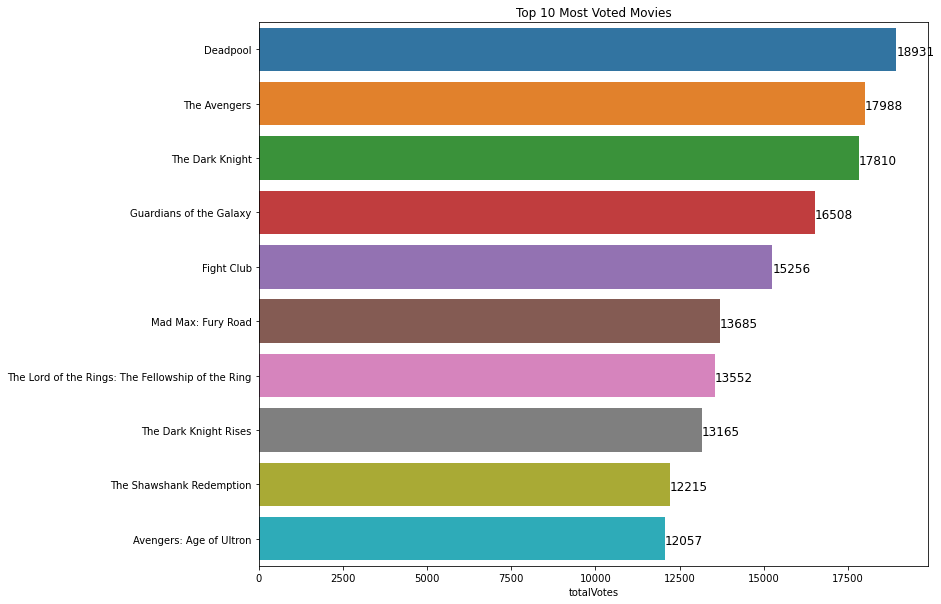

In [35]:
# Plot the Top 10 most voted movies to a horizontal bar chart
# --------------------------------------------------------------------------------
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='title', x='totalVotes', data=most_votes, order=most_votes.sort_values('totalVotes', ascending=False).title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 10 Most Voted Movies', fontsize=12)
plt.ylabel('')
plt.show()

## Top 10 Highest Rated Movies

In [36]:
# Create dataframe which returns the Top 10 highest rated movies based on rating. Add new columns 'revenue(million)' and 'budget(million)' and return the result.
# --------------------------------------------------------------------------------
highest_rating = data_explore.sort_values('rating', ascending=False).head(10)
highest_rating['revenue(million)'] = highest_rating['revenue'].apply(lambda x : x//1000000)    # revenue in millions
highest_rating['budget(million)'] = highest_rating['budget'].apply(lambda x : x//1000000)    # budget in millions
highest_rating[['genres','title', 'production_companies','popularity', 'popularity2','rating','totalVotes', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,title,production_companies,popularity,popularity2,rating,totalVotes,cast,crew,budget(million),revenue(million)
586,[Music],Katyar Kaljat Ghusali,[],0.446454,0.674,9.0,2.0,[Shankar Mahadevan],[Subodh Bhave],1,4
2946,"[Drama, Comedy, Romance]",My Best Girl,[Mary Pickford Company],0.205671,1.247,8.8,4.0,"[Mary Pickford, Charles 'Buddy' Rogers, Sunshi...",[Sam Taylor],0,1
2016,"[Drama, Crime]",The Shawshank Redemption,"[Castle Rock Entertainment, Warner Bros.]",51.645403,30.102,8.6,12215.0,"[Tim Robbins, Morgan Freeman, Bob Gunton]",[Frank Darabont],25,28
1093,"[Drama, Crime]",The Godfather,"[Paramount Pictures, Alfran Productions]",41.109264,24.786,8.6,9368.0,"[Marlon Brando, Al Pacino, James Caan]",[Francis Ford Coppola],6,245
2795,"[Drama, History]",The Visual Bible: The Gospel of John,"[Gospel of John Ltd., Toronto Film Studios, Vi...",1.551648,1.573,8.6,17.0,"[Christopher Plummer, Henry Ian Cusick, Stuart...",[Philip Saville],10,4
2721,"[Drama, Comedy]",There Goes My Baby,[Nelson Entertainment],0.377787,1.160,8.5,2.0,"[Dermot Mulroney, Ricky Schroder, Kelli Williams]",[Floyd Mutrux],10,0
2652,[Comedy],The Great Dictator,"[United Artists, Roy Export Company Establishm...",9.241748,10.793,8.4,1345.0,"[Charlie Chaplin, Jack Oakie, Reginald Gardiner]",[Charlie Chaplin],2,11
1673,"[Drama, Action, Crime, Thriller]",The Dark Knight,"[DC Comics, Legendary Pictures, Warner Bros., ...",123.167259,31.350,8.4,17810.0,"[Christian Bale, Michael Caine, Heath Ledger]",[Christopher Nolan],185,1004
2338,[Drama],Fight Club,"[Twentieth Century Fox Film Corporation, Regen...",63.869599,32.799,8.4,15256.0,"[Edward Norton, Brad Pitt, Meat Loaf]",[David Fincher],63,100
2765,"[Drama, Romance]",Cinema Paradiso,[Rai Tre Radiotelevisione Italiana],14.177005,10.515,8.4,1591.0,"[Philippe Noiret, Jacques Perrin, Marco Leonardi]",[Giuseppe Tornatore],0,11


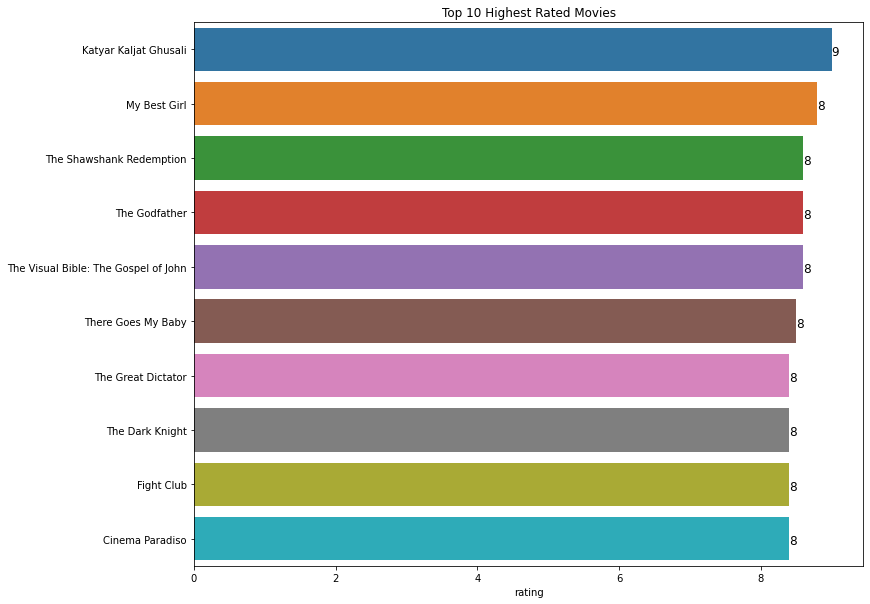

In [37]:
# Plot the Top 10 highest rated movies to a horizontal bar chart
# --------------------------------------------------------------------------------
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='title', x='rating', data=highest_rating, order=highest_rating.sort_values('rating', ascending=False).title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 10 Highest Rated Movies', fontsize=12)
plt.ylabel('')
plt.show()

## Top 10 Highest Revenue Movies

In [38]:
# Create dataframe which returns the Top 10 highest revenue movies based on revenue. Add new columns 'revenue(million)' and 'budget(million)' and return the result.
# --------------------------------------------------------------------------------
highest_revenue = data_explore.sort_values('revenue', ascending=False).head(10)
highest_revenue['revenue(million)'] = highest_revenue['revenue'].apply(lambda x : x//1000000)    # revenue in millions
highest_revenue['budget(million)'] = highest_revenue['budget'].apply(lambda x : x//1000000)    # budget in millions
highest_revenue[['genres','title', 'production_companies','popularity', 'popularity2','rating','totalVotes', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,title,production_companies,popularity,popularity2,rating,totalVotes,cast,crew,budget(million),revenue(million)
1126,"[Science Fiction, Action, Adventure]",The Avengers,"[Paramount Pictures, Marvel Studios]",89.887648,45.153,7.6,17988.0,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],220,1519
1761,[Action],Furious 7,"[Universal Pictures, Original Film, Fuji Telev...",27.275687,23.527,7.3,6178.0,"[Vin Diesel, Paul Walker, Dwayne Johnson]",[James Wan],190,1506
2770,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",37.379420,36.059,7.3,12057.0,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],280,1405
684,"[Family, Fantasy, Romance]",Beauty and the Beast,"[Walt Disney Pictures, Mandeville Films]",287.253654,27.941,6.9,10470.0,"[Emma Watson, Dan Stevens, Luke Evans]",[Bill Condon],160,1262
2322,"[Action, Science Fiction, Adventure]",Transformers: Dark of the Moon,"[Paramount Pictures, Di Bonaventura Pictures, ...",4.503505,3.699,6.1,4682.0,"[Shia LaBeouf, John Malkovich, Ken Jeong]",[Michael Bay],195,1123
906,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,"[Legendary Pictures, Warner Bros., DC Entertai...",20.582580,23.035,7.7,13165.0,[],[],250,1084
2135,"[Adventure, Action, Fantasy]",Pirates of the Caribbean: On Stranger Tides,"[Walt Disney Pictures, Jerry Bruckheimer Films...",27.887720,20.948,6.4,8040.0,"[Johnny Depp, Pen√©lope Cruz, Ian McShane]",[Rob Marshall],380,1045
2562,"[Adventure, Animation, Comedy, Family]",Finding Dory,"[Walt Disney Pictures, Pixar Animation Studios...",14.477677,15.535,7.0,7349.0,"[Ellen DeGeneres, Albert Brooks, Hayden Rolence]","[Andrew Stanton, Angus MacLane]",200,1028
881,"[Family, Fantasy, Adventure]",Alice in Wonderland,"[Walt Disney Pictures, Team Todd, Tim Burton P...",17.285093,17.123,6.5,8056.0,"[Mia Wasikowska, Johnny Depp, Anne Hathaway]",[Tim Burton],200,1025
734,"[Animation, Adventure, Family, Comedy]",Zootopia,"[Walt Disney Pictures, Walt Disney Animation S...",26.024868,31.637,7.7,9349.0,"[Ginnifer Goodwin, Jason Bateman, Shakira]","[Byron Howard, Rich Moore, Jared Bush]",150,1023


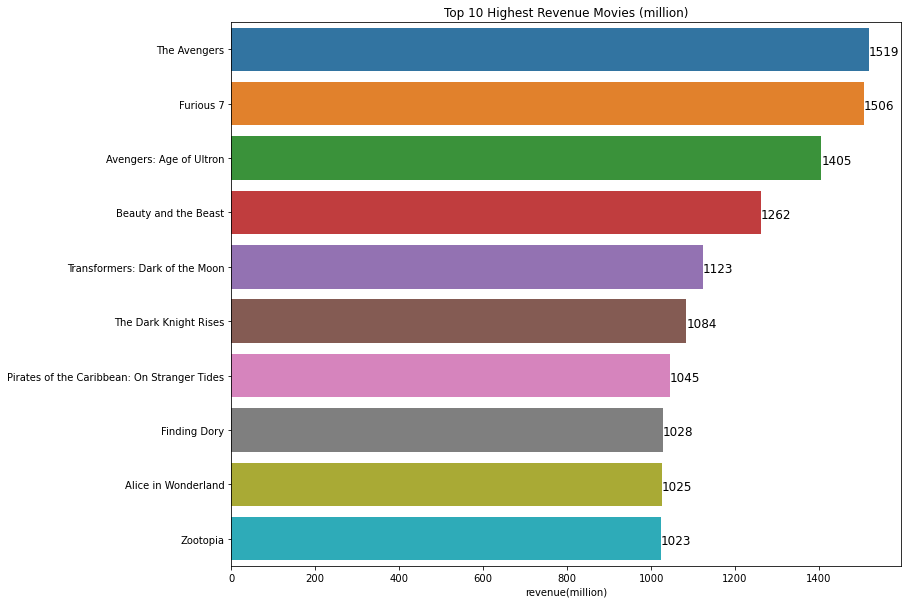

In [39]:
# Plot the Top 10 highest Revenue movies to a horizontal bar chart
# --------------------------------------------------------------------------------
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='title', x='revenue(million)', data=highest_revenue, order=highest_revenue.sort_values('revenue(million)', ascending=False).title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 10 Highest Revenue Movies (million)', fontsize=12)
plt.ylabel('')
plt.show()

## Top 10 Highest Budgeted Movies

In [40]:
# Create dataframe which returns the Top 10 highest budgested movies based on budget. Add new columns 'revenue(million)' and 'budget(million)' and return the result.
# --------------------------------------------------------------------------------
highest_budget = data_explore.sort_values('budget', ascending=False).head(10)
highest_budget['revenue(million)'] = highest_budget['revenue'].apply(lambda x : x//1000000)    # revenue in millions
highest_budget['budget(million)'] = highest_budget['budget'].apply(lambda x : x//1000000)    # budgest in millions
highest_budget[['genres','title', 'production_companies','popularity', 'popularity2','rating','totalVotes', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,title,production_companies,popularity,popularity2,rating,totalVotes,cast,crew,budget(million),revenue(million)
2135,"[Adventure, Action, Fantasy]",Pirates of the Caribbean: On Stranger Tides,"[Walt Disney Pictures, Jerry Bruckheimer Films...",27.887720,20.948,6.4,8040.0,"[Johnny Depp, Pen√©lope Cruz, Ian McShane]",[Rob Marshall],380,1045
2209,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,"[Walt Disney Pictures, Jerry Bruckheimer Films...",31.363664,23.290,7.1,7788.0,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],300,961
2770,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",37.379420,36.059,7.3,12057.0,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],280,1405
1425,"[Adventure, Fantasy, Action, Science Fiction]",Superman Returns,"[DC Comics, Legendary Pictures, Warner Bros., ...",13.284712,14.746,5.5,2194.0,"[Brandon Routh, Kevin Spacey, Kate Bosworth]",[Bryan Singer],270,391
1270,"[Action, Adventure, Science Fiction]",John Carter,[Walt Disney Pictures],14.670353,12.593,6.1,3132.0,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],260,284
1630,"[Action, Science Fiction, Thriller, Adventure]",Transformers: The Last Knight,"[Paramount Pictures, Di Bonaventura Pictures, ...",39.186819,28.409,6.0,3026.0,"[Mark Wahlberg, Josh Duhamel, Laura Haddock]",[Michael Bay],260,604
2532,"[Adventure, Fantasy, Action]",The Hobbit: An Unexpected Journey,"[WingNut Films, New Line Cinema, Warner Bros. ...",23.253089,24.642,7.2,11498.0,"[Ian McKellen, Martin Freeman, Richard Armitage]",[Peter Jackson],250,1021
961,"[Adventure, Fantasy, Family]",Harry Potter and the Half-Blood Prince,"[Warner Bros., Heyday Films]",19.083723,29.714,7.6,9712.0,"[Daniel Radcliffe, Rupert Grint, Emma Watson]",[David Yates],250,933
906,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,"[Legendary Pictures, Warner Bros., DC Entertai...",20.582580,23.035,7.7,13165.0,[],[],250,1084
666,"[Adventure, Fantasy]",The Hobbit: The Desolation of Smaug,"[WingNut Films, New Line Cinema, Warner Bros. ...",20.644776,18.718,7.6,7234.0,"[Martin Freeman, Ian McKellen, Richard Armitage]",[Peter Jackson],250,958


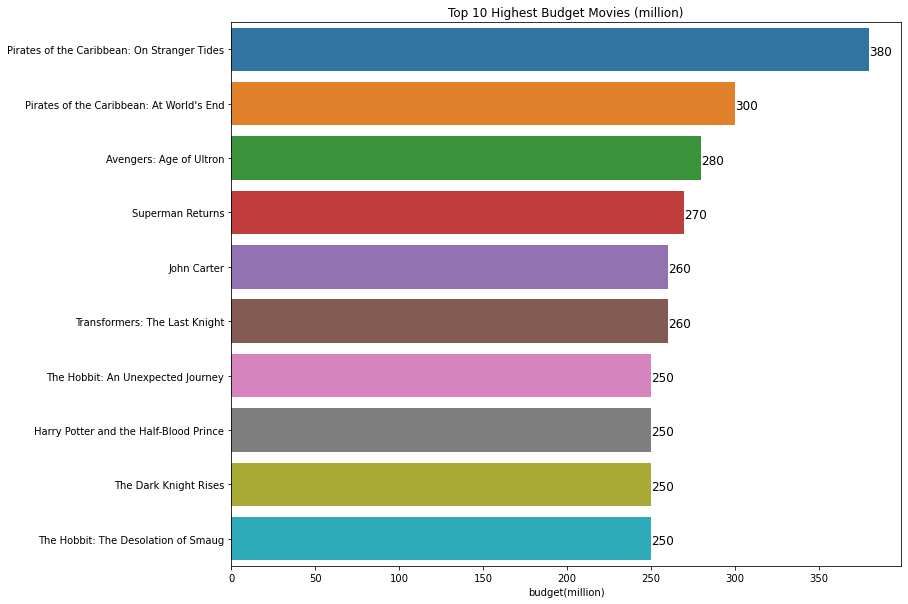

In [41]:
# Plot the Top 10 highest budgeted movies to a horizontal bar chart
# --------------------------------------------------------------------------------
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='title', x='budget(million)', data=highest_budget, order=highest_budget.sort_values('budget(million)', ascending=False).title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 10 Highest Budget Movies (million)', fontsize=12)
plt.ylabel('')
plt.show()

## Top 10 Highest Gross Income Movies

In [42]:
# Create dataframe which returns the Top 10 highest grossing movies based on calculation of revenue(million) minus 'budget(million)'
# --------------------------------------------------------------------------------
highest_profit = data_explore.copy()
highest_profit['revenue(million)'] = highest_profit['revenue'].apply(lambda x : x//1000000)    # revenue in millions
highest_profit['budget(million)'] = highest_profit['budget'].apply(lambda x : x//1000000)    # budget in millions
highest_profit['profit(million)'] = highest_profit['revenue(million)']-highest_profit['budget(million)']
highest_profit = highest_profit.sort_values('profit(million)', ascending=False).head(10)
highest_profit[['genres','title', 'production_companies','popularity', 'popularity2','rating','totalVotes', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,title,production_companies,popularity,popularity2,rating,totalVotes,cast,crew,budget(million),revenue(million)
1761,[Action],Furious 7,"[Universal Pictures, Original Film, Fuji Telev...",27.275687,23.527,7.3,6178.0,"[Vin Diesel, Paul Walker, Dwayne Johnson]",[James Wan],190,1506
1126,"[Science Fiction, Action, Adventure]",The Avengers,"[Paramount Pictures, Marvel Studios]",89.887648,45.153,7.6,17988.0,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],220,1519
2770,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",37.379420,36.059,7.3,12057.0,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],280,1405
684,"[Family, Fantasy, Romance]",Beauty and the Beast,"[Walt Disney Pictures, Mandeville Films]",287.253654,27.941,6.9,10470.0,"[Emma Watson, Dan Stevens, Luke Evans]",[Bill Condon],160,1262
2322,"[Action, Science Fiction, Adventure]",Transformers: Dark of the Moon,"[Paramount Pictures, Di Bonaventura Pictures, ...",4.503505,3.699,6.1,4682.0,"[Shia LaBeouf, John Malkovich, Ken Jeong]",[Michael Bay],195,1123
734,"[Animation, Adventure, Family, Comedy]",Zootopia,"[Walt Disney Pictures, Walt Disney Animation S...",26.024868,31.637,7.7,9349.0,"[Ginnifer Goodwin, Jason Bateman, Shakira]","[Byron Howard, Rich Moore, Jared Bush]",150,1023
1735,"[Adventure, Science Fiction]",Jurassic Park,"[Universal Pictures, Amblin Entertainment]",8.863776,13.347,7.8,8295.0,"[Sam Neill, Laura Dern, Jeff Goldblum]",[Steven Spielberg],63,920
543,"[Adventure, Fantasy, Action]",The Lord of the Rings: The Two Towers,"[WingNut Films, New Line Cinema, The Saul Zaen...",29.423537,24.886,8.2,11696.0,"[Elijah Wood, Ian McKellen, Viggo Mortensen]",[Peter Jackson],79,926
906,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,"[Legendary Pictures, Warner Bros., DC Entertai...",20.582580,23.035,7.7,13165.0,[],[],250,1084
2562,"[Adventure, Animation, Comedy, Family]",Finding Dory,"[Walt Disney Pictures, Pixar Animation Studios...",14.477677,15.535,7.0,7349.0,"[Ellen DeGeneres, Albert Brooks, Hayden Rolence]","[Andrew Stanton, Angus MacLane]",200,1028


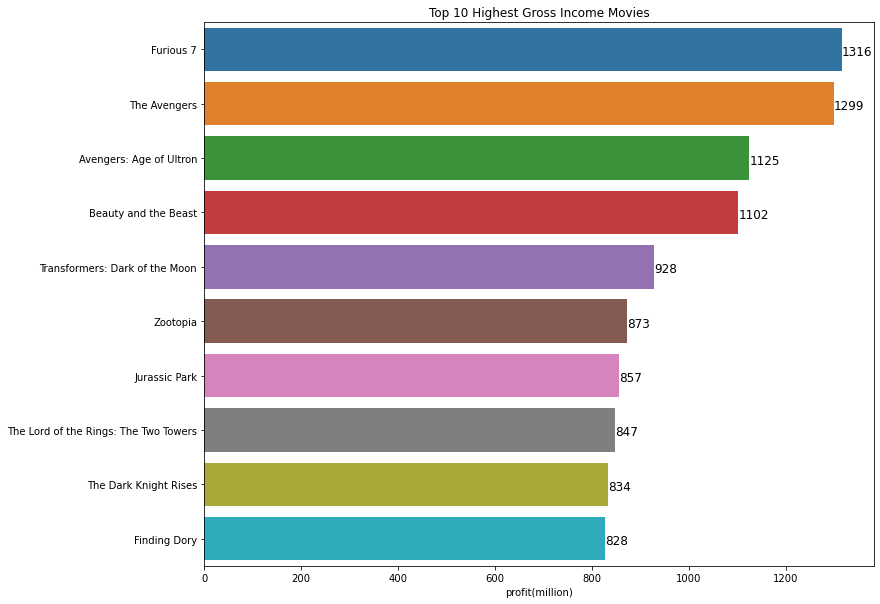

In [43]:
# Plot the Top 10 highest Gross Income movies to a horizontal bar chart
# --------------------------------------------------------------------------------
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='title', x='profit(million)', data=highest_profit, order=highest_profit.sort_values('profit(million)', ascending=False).title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 10 Highest Gross Income Movies', fontsize=12)
plt.ylabel('')
plt.show()

## Genre

**pd.concat** - Concatenate pandas objects along a particular axis with optional set logic along the other axes. Can also add a layer of hierarchical indexing on the concatenation axis, which may be useful if the labels are the same (or overlapping) on the passed axis number.

In [44]:
# Create dataframe with all Genres containing a 1 for Movies where the Genre is applicable and 0 where the Genre is not applicable
# --------------------------------------------------------------------------------
data_explore_encode = data_explore['genres'].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')
data_explore_genres = pd.concat([data_explore, data_explore_encode], axis=1)
genres = data_explore_encode.columns
data_explore_genres.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,sequel,release_year,release_month,release_day,release_dayofweek,num_of_keywords,all_keywords,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_biography,keyword_aftercreditsstinger,keyword_dystopia,num_of_languages,all_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Documentary,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,TV Movie
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,[Comedy],,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/2015,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke]",[Steve Pink],12314651,10.400,5.0,482.0,1,2015,2,20,4,4,duringcreditsstinger hot tub sequel time travel,0,0,1,0,0,0,0,0,0,0,1,English,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[Comedy, Drama, Family, Romance]",,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],[United States of America],8/6/2004,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizondo]",[Garry Marshall],95149435,15.229,6.4,1528.0,1,2004,8,6,4,4,coronation duty falling in love marriage,0,0,0,0,0,0,0,0,0,0,1,English,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
# Create a list to store calculated variables
# --------------------------------------------------------------------------------
genres_info = []
for col in genres:
    total_movies, total_budget, median_budget, total_revenue, median_revenue, median_popularity, median_popularity2, median_rating, median_totalVotes =0, 0, 0, 0, 0, 0, 0, 0, 0
    total_movies = data_explore_genres[data_explore_genres[col]==1][col].count()
    total_budget = data_explore_genres[data_explore_genres[col]==1]['budget'].sum()
    median_budget = data_explore_genres[data_explore_genres[col]==1]['budget'].median()
    total_revenue = data_explore_genres[data_explore_genres[col]==1]['revenue'].sum()
    median_revenue = data_explore_genres[data_explore_genres[col]==1]['revenue'].median()
    median_popularity = data_explore_genres[data_explore_genres[col]==1]['popularity'].median()
    median_popularity2 = data_explore_genres[data_explore_genres[col]==1]['popularity2'].median()
    median_rating = data_explore_genres[data_explore_genres[col]==1]['rating'].median()
    median_totalVotes = data_explore_genres[data_explore_genres[col]==1]['totalVotes'].median()
    genres_info.append([col, total_movies, total_budget, median_budget, total_revenue, median_revenue, median_popularity,median_popularity2, median_rating, median_totalVotes])

In [46]:
# Create a dataframe to return the list summary and add new columns to dataframe
# --------------------------------------------------------------------------------
genres_info = pd.DataFrame(genres_info, columns=['genres', 'movies_count', 'total_budget', 'median_budget', 'total_revenue', 'median_revenue', 'median_popularity','median_popularity2', 'median_rating', 'median_totalVotes'])
genres_info['total_budget(million)'] = genres_info['total_budget'].apply(lambda x : x//1000000)    # budget in millions
genres_info['median_budget(million)'] = genres_info['median_budget'].apply(lambda x : x//1000000)    # budget in millions
genres_info['total_revenue(million)'] = genres_info['total_revenue'].apply(lambda x : x//1000000)    # revenue in millions
genres_info['median_revenue(million)'] = genres_info['median_revenue'].apply(lambda x : x//1000000)    # revenue in millions
genres_info[['genres', 'movies_count', 'total_budget(million)', 'median_budget(million)', 'total_revenue(million)', 'median_revenue(million)', 'median_popularity','median_popularity2', 'median_rating', 'median_totalVotes']]
genre_summary = genres_info.reset_index()
genre_summary

,index,genres,movies_count,total_budget,median_budget,total_revenue,median_revenue,median_popularity,median_popularity2,median_rating,median_totalVotes,total_budget(million),median_budget(million),total_revenue(million),median_revenue(million)
0,0,Comedy,1028,19614445621,8000000.0,62580263721,18809184.0,6.905488,7.0315,6.1,232.5,19614,8.0,62580,18.0
1,1,Drama,1531,25733940425,6000000.0,69516699191,11293663.0,6.793972,6.8820,6.6,206.0,25733,6.0,69516,11.0
2,2,Family,260,11048890059,24500000.0,36113426664,57470029.5,8.416440,7.8890,6.2,456.0,11048,24.0,36113,57.0
3,3,Romance,571,8944336886,5500000.0,30094559216,14016568.0,6.370105,6.5220,6.4,155.0,8944,5.0,30094,14.0
4,4,Thriller,789,20873192826,13000000.0,53917610066,21890845.0,8.371005,8.4160,6.2,425.0,20873,13.0,53917,21.0
5,5,Action,741,29934126656,20000000.0,82283193867,36000000.0,8.345985,8.3780,6.2,396.0,29934,20.0,82283,36.0
6,6,Animation,141,5967983384,23000000.0,20830507010,36754634.0,9.409701,8.5690,6.6,491.0,5967,23.0,20830,36.0
7,7,Adventure,439,23738161039,28000000.0,77180369998,59700000.0,9.961184,9.0370,6.3,600.0,23738,28.0,77180,59.0
8,8,Horror,301,4578070363,6000000.0,15865430318,17037887.0,8.122042,8.3110,5.9,330.0,4578,6.0,15865,17.0
9,9,Documentary,87,76787594,0.0,403506794,268431.0,1.949044,2.4890,6.9,31.0,76,0.0,403,0.0


In [47]:
genre_summary

,index,genres,movies_count,total_budget,median_budget,total_revenue,median_revenue,median_popularity,median_popularity2,median_rating,median_totalVotes,total_budget(million),median_budget(million),total_revenue(million),median_revenue(million)
0,0,Comedy,1028,19614445621,8000000.0,62580263721,18809184.0,6.905488,7.0315,6.1,232.5,19614,8.0,62580,18.0
1,1,Drama,1531,25733940425,6000000.0,69516699191,11293663.0,6.793972,6.8820,6.6,206.0,25733,6.0,69516,11.0
2,2,Family,260,11048890059,24500000.0,36113426664,57470029.5,8.416440,7.8890,6.2,456.0,11048,24.0,36113,57.0
3,3,Romance,571,8944336886,5500000.0,30094559216,14016568.0,6.370105,6.5220,6.4,155.0,8944,5.0,30094,14.0
4,4,Thriller,789,20873192826,13000000.0,53917610066,21890845.0,8.371005,8.4160,6.2,425.0,20873,13.0,53917,21.0
5,5,Action,741,29934126656,20000000.0,82283193867,36000000.0,8.345985,8.3780,6.2,396.0,29934,20.0,82283,36.0
6,6,Animation,141,5967983384,23000000.0,20830507010,36754634.0,9.409701,8.5690,6.6,491.0,5967,23.0,20830,36.0
7,7,Adventure,439,23738161039,28000000.0,77180369998,59700000.0,9.961184,9.0370,6.3,600.0,23738,28.0,77180,59.0
8,8,Horror,301,4578070363,6000000.0,15865430318,17037887.0,8.122042,8.3110,5.9,330.0,4578,6.0,15865,17.0
9,9,Documentary,87,76787594,0.0,403506794,268431.0,1.949044,2.4890,6.9,31.0,76,0.0,403,0.0


## Total count of Movies per Genre

The bars are positioned at x with the given alignment. Their dimensions are given by height and width. The vertical baseline is bottom (default 0).

**sns.barplot** - Show point estimates and confidence intervals as rectangular bars.

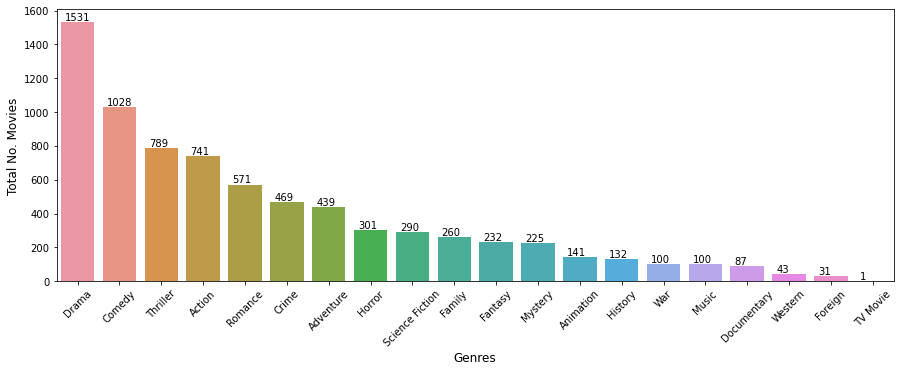

In [48]:
# Plot the total count of movies per genre using  seaborn bar chart
# --------------------------------------------------------------------------------
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='genres', y='movies_count', data=genres_info, order=genres_info.sort_values('movies_count', ascending=False).genres)
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_height())), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation=45)
plt.ylabel('Total No. Movies', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.show()

## Median Popularity per Genre

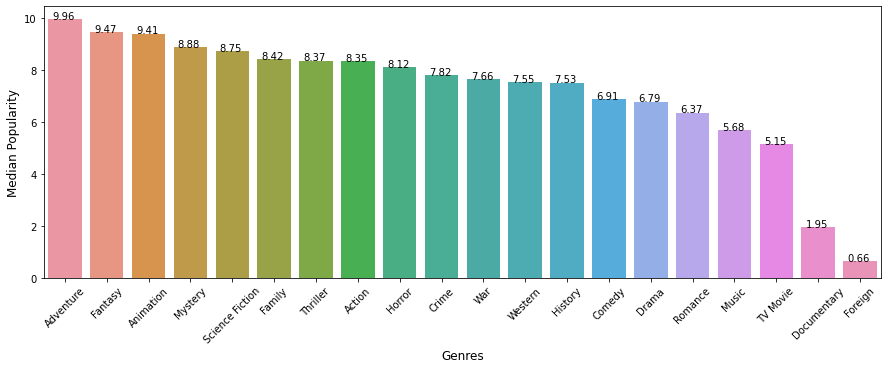

<Figure size 432x288 with 0 Axes>

In [68]:
# Plot the median popularity of movies per genre using seaborn bar chart
# --------------------------------------------------------------------------------
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='genres', y='median_popularity', data=genres_info, order=genres_info.sort_values('median_popularity', ascending=False).genres)
for p in ax.patches:
        ax.annotate('{}'.format(np.round(p.get_height(), 2)), (p.get_x()+0.1, p.get_height()))
plt.xticks(rotation=45)
plt.ylabel('Median Popularity', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.show()

# Save and Show plot
plt.tight_layout()
plt.savefig("../Images/GenrePopularity.png")
plt.show()

## Median Rating per Genre

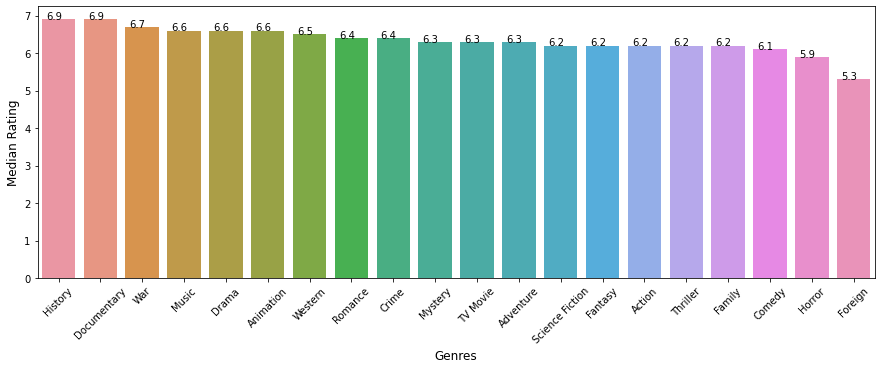

In [50]:
# Plot the median rating of movies per genre using seaborn bar chart
# --------------------------------------------------------------------------------
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='genres', y='median_rating', data=genres_info, order=genres_info.sort_values('median_rating', ascending=False).genres)
for p in ax.patches:
        ax.annotate('{}'.format(np.round(p.get_height(), 2)), (p.get_x()+0.1, p.get_height()))
plt.xticks(rotation=45)
plt.ylabel('Median Rating', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.show()

## Median Votes per Genre

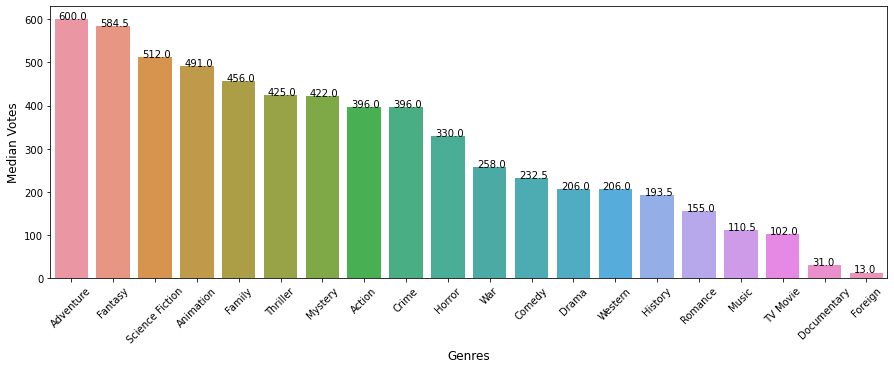

In [51]:
# Plot the median votes of movies per genre using seaborn bar chart
# --------------------------------------------------------------------------------
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='genres', y='median_totalVotes', data=genres_info, order=genres_info.sort_values('median_totalVotes', ascending=False).genres)
for p in ax.patches:
        ax.annotate('{}'.format(np.round(p.get_height(), 2)), (p.get_x()+0.1, p.get_height()))
plt.xticks(rotation=45)
plt.ylabel('Median Votes', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.show()

## Median Movie Revenue v Budget per Genre

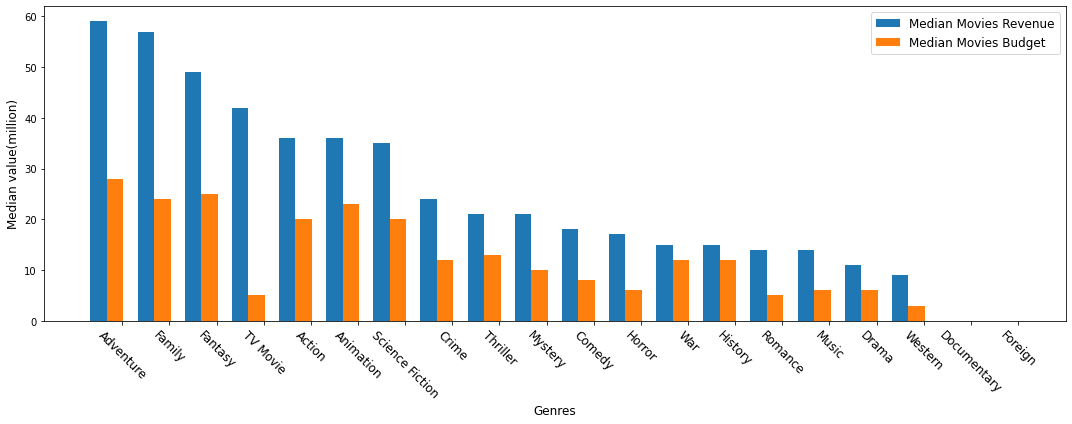

In [52]:
# Plot the median revenue versus budget of movies per genre using Matplotlib bar chart
# --------------------------------------------------------------------------------
plt.figure(figsize=(15, 6))
x_indexes = np.arange(len(genres))     
width = 0.35                            
genres_info = genres_info.sort_values('median_revenue(million)', ascending=False)
plt.bar(x_indexes,  genres_info['median_revenue(million)'], label="Median Movies Revenue", width=width)
plt.bar(x_indexes + width,  genres_info['median_budget(million)'], label="Median Movies Budget", width=width)
plt.legend(loc="upper right", fontsize=12)
plt.xticks(ticks=x_indexes+0.5, labels=genres_info['genres'].values, fontsize=12, rotation=-45)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Median value(million)', fontsize=12)
# plt.show()


# Save and Show plot
plt.tight_layout()
plt.savefig("../Images/RevenuevBudget.png")
plt.show()

## Average Revenue Per Year

**set_scientific** - True or False to turn scientific notation on or off

**.get_major_formatter()** - Set the formatter of the major ticker.

(31.5, 89.5)

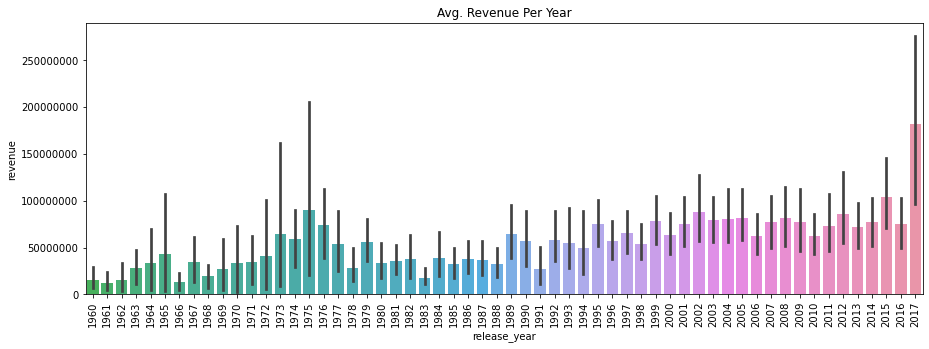

In [53]:
# Plot the average revenue per yesr of movies per genre using seaborn bar chart
# --------------------------------------------------------------------------------
plt.figure(figsize=(15, 5))
sns.barplot(x='release_year', y='revenue', data=data_explore, estimator=np.mean)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Avg. Revenue Per Year')
ax.set_xlim(left=31.5)

## Average Revenue Per Month

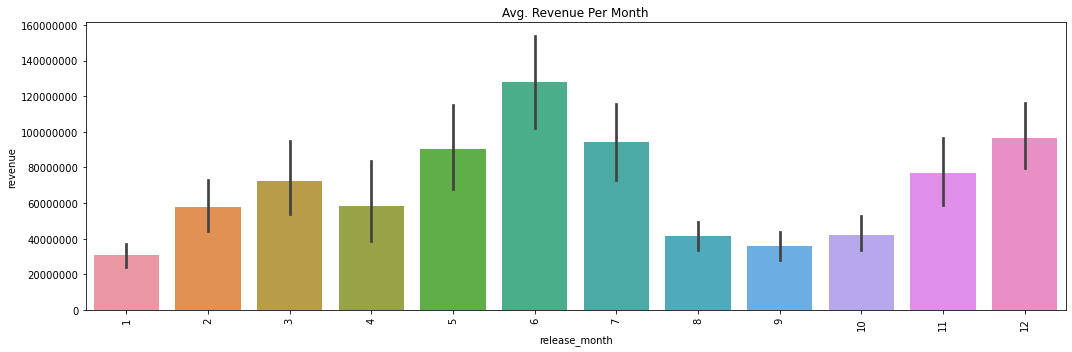

In [65]:
# Plot the average revenue per month of movies per genre using seaborn bar chart
# --------------------------------------------------------------------------------
plt.figure(figsize=(15, 5))
sns.barplot(x='release_month', y='revenue', data=data_explore, estimator=np.mean)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Avg. Revenue Per Month')

# Save and Show plot
plt.tight_layout()
plt.savefig("../Images/RevenuevMonth.png")
plt.show()

## Average Revenue Per Day of the Week

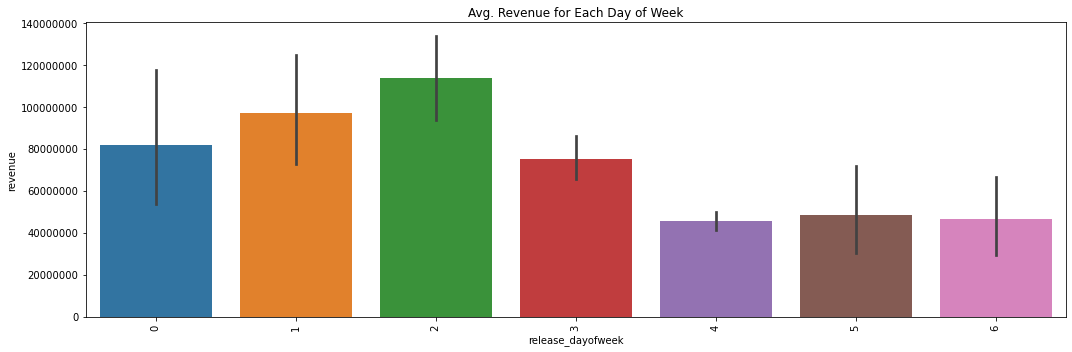

In [66]:
# Plot the average revenue per day of week of movies per genre using seaborn bar chart
# --------------------------------------------------------------------------------
plt.figure(figsize=(15, 5))
sns.barplot(x='release_dayofweek', y='revenue', data=data_explore, estimator=np.mean)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Avg. Revenue for Each Day of Week')

# Save and Show plot
plt.tight_layout()
plt.savefig("../Images/RevenuevDOW.png")
plt.show()

## Corelation Plot

A correlation matrix is tabular data representing the ‘correlations’ between pairs of variables in a given data. 

Each row and column represents a variable, and each value in this matrix is the correlation coefficient between the variables represented by the corresponding row and column.

The Correlation matrix is an important data analysis metric that is computed to summarize data to understand the relationship between various variables and make decisions accordingly.

It is also an important pre-processing step in Machine Learning pipelines to compute and analyze the correlation matrix where dimensionality reduction is desired on a high-dimension data.

In [56]:
# Show all columns in a list
# --------------------------------------------------------------------------------
data_explore.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'popularity2', 'rating', 'totalVotes', 'sequel', 'release_year',
       'release_month', 'release_day', 'release_dayofweek', 'num_of_keywords',
       'all_keywords', 'keyword_woman director', 'keyword_independent film',
       'keyword_duringcreditsstinger', 'keyword_murder',
       'keyword_based on novel', 'keyword_violence', 'keyword_sport',
       'keyword_biography', 'keyword_aftercreditsstinger', 'keyword_dystopia',
       'num_of_languages', 'all_languages', 'language_English',
       'language_Français', 'language_Español', 'language_Deutsch',
       'language_Pусский'],
      dtype='object')

In [57]:
# Create a correlation dataframe to plot
# --------------------------------------------------------------------------------
corr_df = data_explore[['imdb_id','title','genres','popularity','popularity2',
                        'production_companies','production_countries','status','cast', 'crew', 'budget','revenue',
                         'rating', 'totalVotes', 'sequel', 'release_year','runtime','num_of_keywords','num_of_languages']]

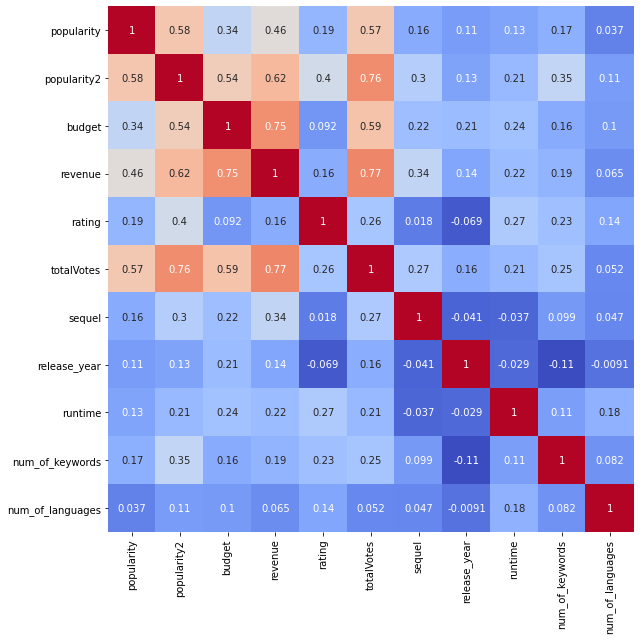

In [67]:
# Plot the correlation matrix using seaborn to see the ‘correlations’ between pairs of variables in a data.
# --------------------------------------------------------------------------------
plt.figure(figsize=(15, 9))
corr_matrix = corr_df.corr()
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), square=True, annot=True, cbar=False,cmap='coolwarm')
plt.tight_layout()

# Save and Show plot
plt.tight_layout()
plt.savefig("../Images/CorrelationPlot.png")
plt.show()

In [59]:
# Print the correlation on revenue in ascending order
# --------------------------------------------------------------------------------
corr_matrix['revenue'].sort_values(ascending=False)

revenue             1.000000
totalVotes          0.774167
budget              0.752965
popularity2         0.624727
popularity          0.461460
sequel              0.339425
runtime             0.216417
num_of_keywords     0.187721
rating              0.159692
release_year        0.137933
num_of_languages    0.064961
Name: revenue, dtype: float64

## Saving to CSV

In [60]:
# Show all columns in a list
# --------------------------------------------------------------------------------
data_explore.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'popularity2', 'rating', 'totalVotes', 'sequel', 'release_year',
       'release_month', 'release_day', 'release_dayofweek', 'num_of_keywords',
       'all_keywords', 'keyword_woman director', 'keyword_independent film',
       'keyword_duringcreditsstinger', 'keyword_murder',
       'keyword_based on novel', 'keyword_violence', 'keyword_sport',
       'keyword_biography', 'keyword_aftercreditsstinger', 'keyword_dystopia',
       'num_of_languages', 'all_languages', 'language_English',
       'language_Français', 'language_Español', 'language_Deutsch',
       'language_Pусский'],
      dtype='object')

In [61]:
# Show all columns in a list
# --------------------------------------------------------------------------------
data_explore_genres.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'popularity2', 'rating', 'totalVotes', 'sequel', 'release_year',
       'release_month', 'release_day', 'release_dayofweek', 'num_of_keywords',
       'all_keywords', 'keyword_woman director', 'keyword_independent film',
       'keyword_duringcreditsstinger', 'keyword_murder',
       'keyword_based on novel', 'keyword_violence', 'keyword_sport',
       'keyword_biography', 'keyword_aftercreditsstinger', 'keyword_dystopia',
       'num_of_languages', 'all_languages', 'language_English',
       'language_Français', 'language_Español', 'language_Deutsch',
       'language_Pусский', 'Comedy', 'Drama', 'Family', 'Romance', 'Thriller',
  

In [62]:
# Save dataframe to csv file
# --------------------------------------------------------------------------------
# data_explore_genres.to_csv("../Resources/data/model_data.csv",index=False)

In [63]:
# Create dataframe for data html page table and save to csv file
# --------------------------------------------------------------------------------
# database_html = data_explore[['imdb_id','title','genres', 'status',
#                               'release_year','runtime','cast', 'crew','spoken_languages',
#                               'popularity2', 'rating', 'totalVotes','budget','revenue']]
# database_html.to_csv("../Resources/data/database_html.csv",index=False)     

In [64]:
# Create dataframe for genre to potentially load to the data html page table and save to csv file
# --------------------------------------------------------------------------------
# genre_summary.to_csv("../Resources/data/databaseGenre_html.csv",index=False)

**GENERAL NOTES**
* Lists or Tuples, are made up of elements, which are values of any Python datatype, including other lists and tuples.
* string - It is a series of double-quoted Unicode characters 
* list - Lists are enclosed in square brackets ([ and ]).
* Tuple - Tuples are enclosed in parentheses (( and )).
* Dictionary - An unordered collection of data values, used to store data values like a map, which, unlike other Data Types that hold only a single value as an element, Dictionary holds key:value pair. Key-value is provided in the dictionary to make it more optimized. Dictionary can be created by placing a sequence of elements within curly {} braces, separated by ‘comma’. Dictionary holds a pair of values, one being the Key and the other corresponding pair element being its Key:value. Values in a dictionary can be of any data type and can be duplicated, whereas keys can’t be repeated and must be immutable. Dictionary with the use of Integer Keys: {1: 'Geeks', 2: 'For', 3: 'Geeks'} | Dictionary with the use of Mixed Keys: {1: [1, 2, 3, 4], 'Name': 'Geeks'}


**JSON**

https://www.guru99.com/json-tutorial-example.html

* Data Types in JSON
    ** Number - It includes real number, integer or a floating number
    ** String - It consists of any text or Unicode double-quoted with backslash escapement
    ** Boolean - The Boolean data type represents either True or False values
    ** Null - The Null value denotes that the associated variable doesn't have any value
    ** Object - It is a collection of key-value pairs and always separated by a comma and enclosed in curly brackets.
    ** Array - It is an ordered sequence of values separated.

* Rules for JSON Syntax
    ** Data should be in name/value pairs
    ** Data should be separated by commas
    ** Curly braces should hold objects
    ** Square brackets hold arrays
    
* JSON Object
    ** is an entity in JSON which is enclosed in curly brackets. It is written in the unordered set of name and value pairs in which the name should be followed by “:” (colon), and the name/value pairs need to be separated using "," (comma). It can be used when key names are arbitrary strings.
